In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load The Data
df=pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
5,6,314,8,7,6,7,YES,81,93,6,93,1,4012,B
6,7,332,9,8,7,9,YES,103,120,6,87,4,4503,A
7,8,323,9,8,7,9,NO,0,95,6,82,2,4603,A
8,9,351,8,6,6,8,YES,89,97,6,44,6,4599,B
9,10,339,6,5,5,6,NO,0,111,2,89,5,3489,D


In [4]:
df.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [5]:
df.shape #checking number of rows and columns

(3000, 14)

In [6]:
df.dtypes #checking datatype of each column

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

In [7]:
#check null values are present or not
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

- there are no missing values present in the dataset

In [8]:
num=df.select_dtypes(exclude='object') #get only numeric data
num.head(5)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,1,339,6,5,4,6,0,76,2,79,6,3481
1,2,358,5,4,3,4,71,96,3,72,4,3510
2,3,324,7,5,4,5,101,117,5,64,3,3748
3,4,330,6,4,3,5,101,82,2,59,2,3134
4,5,320,7,4,4,5,0,75,3,40,1,3843


In [9]:
cat=df.select_dtypes(include='object') #get only categorical data
cat.head(5)

,roof,Grade
0,NO,D
1,YES,D
2,YES,C
3,YES,D
4,NO,D


In [10]:
df.duplicated().sum() #check if any duplicated entries are present

0

- There are neither missing values nor duplicated entries present in the dataset

In [11]:
df=df.drop(['Id'], axis = 1).copy()
df.describe() #statistical description of numerical columns

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


# EDA-Exploratory Data Analysis

In [12]:
a=df['roof'].value_counts()
label1=a.index
b=df['Grade'].value_counts()
label2=b.index

In [13]:
label1

Index(['YES', 'NO'], dtype='object')

In [14]:
label2

Index(['D', 'C', 'B', 'A', 'E'], dtype='object')

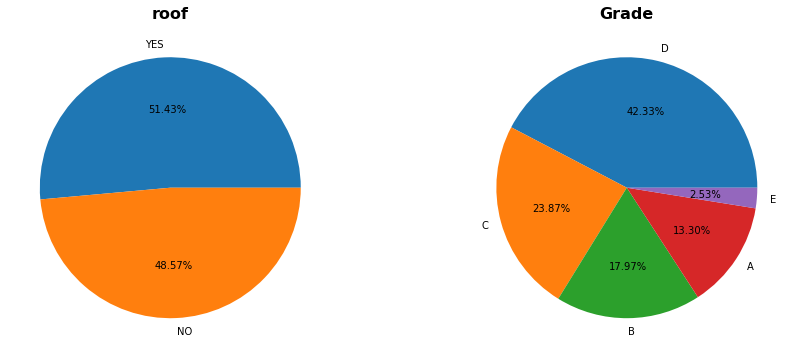

In [15]:
#Visualisations for categorical columns(roof and Grade)
plt.subplots(1,2,figsize=(15,6))

plt.subplot(121)
plt.pie(a,labels=label1,autopct='%.2f%%')
plt.title("roof",fontweight='bold',size=16)

plt.subplot(122)
plt.pie(b,labels=label2,autopct="%.2f%%")
plt.title("Grade",fontweight='bold',size=16)

plt.show()

- The Houses with 'Roof' are more than the houses without roof that is 51.43% . The Houses with 'Grade D' are more compared to other grades that is 42.33% and least houses are with 'Grade E' that is 2.53%.

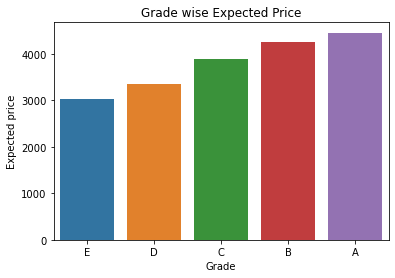

In [16]:
sns.barplot('Grade','Expected price',data=df.sort_values('Expected price'),ci=False)
plt.title('Grade wise Expected Price')
plt.show()

- A grade houses are high priced houses and E grade houses are low in price.

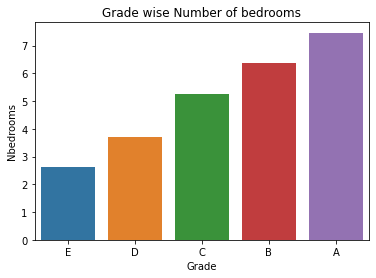

In [17]:
sns.barplot('Grade','Nbedrooms',data=df.sort_values('Nbedrooms'),ci=False)
plt.title('Grade wise Number of bedrooms')
plt.show()

- A grade houses having more bedrooms compared to other grade houses

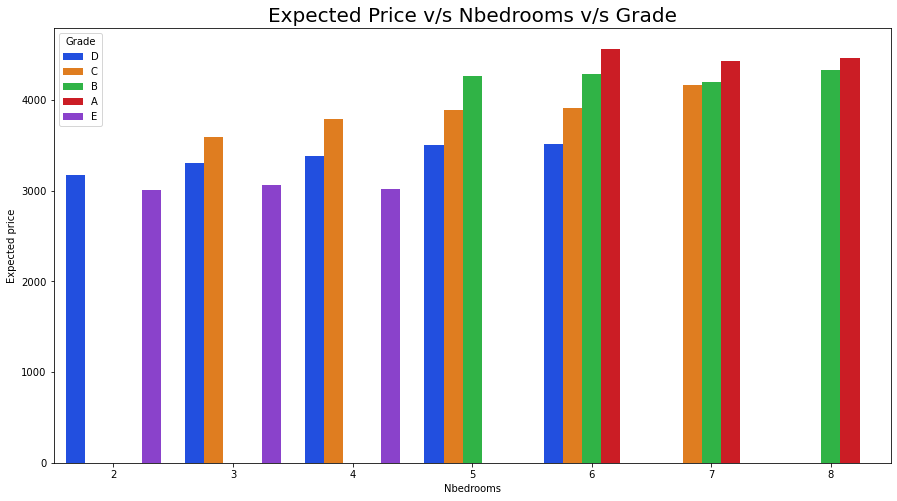

In [18]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'Nbedrooms', y = 'Expected price', hue = 'Grade',data=df,ci=None,palette = 'bright')
plt.title('Expected Price v/s Nbedrooms v/s Grade', fontsize = 20)
plt.show()

- The more number of bedrooms are avialable in grade A and B grade houses and the expected price is also more

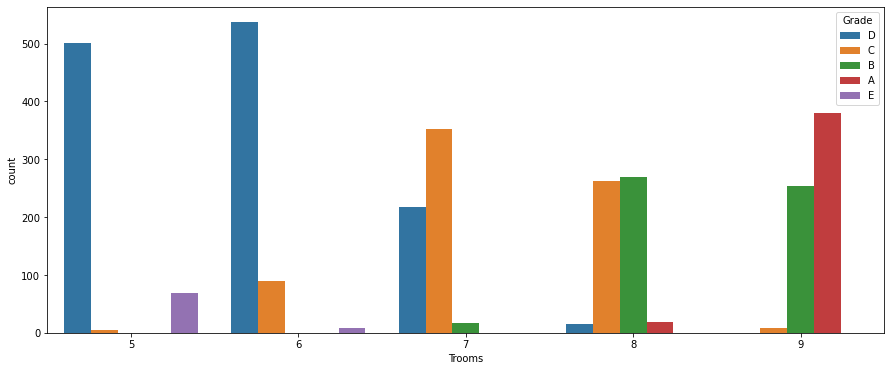

In [19]:
# total number of rooms with respect to grade

plt.figure(figsize=(15,6))
sns.countplot(x='Trooms',hue='Grade',data=df);

In grade-A, the total number of rooms in the houses are: 8 and 9.

In grade-B, the total number of rooms in the houses are: 7,8 and 9.

In grade-C, the total number of rooms in the houses are: 6,7 and 8.

In grade-D, the total number of rooms in the houses are: 5,6 and 7.

In grade-E, the total number of rooms in the houses are: 5 and 6.

​

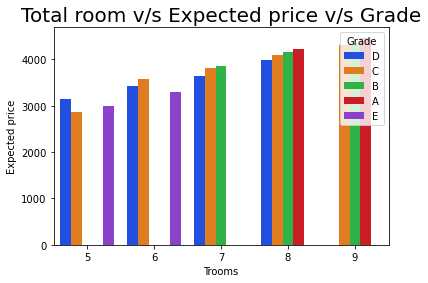

In [20]:
sns.barplot(x = 'Trooms', y = 'Expected price', hue = 'Grade',data=df,ci=None,palette = 'bright')
plt.title('Total room v/s Expected price v/s Grade', fontsize = 20)
plt.show()

- From the above plot we can see that grades distribution over number of rooms The more number of rooms are avialable in grade A, B and C grade houses and the expected price is also more

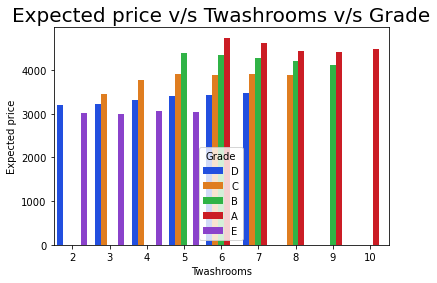

In [21]:
sns.barplot(x = 'Twashrooms', y = 'Expected price', hue = 'Grade', data=df,ci=None,palette = 'bright')
plt.title('Expected price v/s Twashrooms v/s Grade', fontsize = 20)
plt.show()

- From the above plot we can see that grades distribution over total number of washrooms
- The more number of washrooms are avialable in grade A grade houses and the expected price is also more

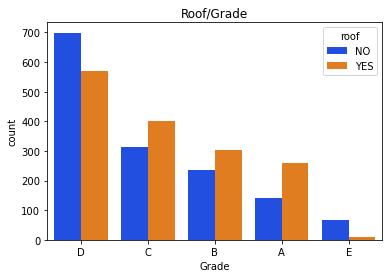

In [22]:
sns.countplot(x='Grade',hue='roof',data=df,palette='bright')
plt.title('Roof/Grade')
plt.show()

- In Grade-D,E most of the houses don't have roofs. Whereas, houses in Grade-A,B,C most of the houses have roofs

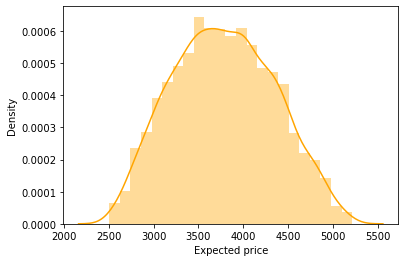

In [23]:
sns.distplot(df['Expected price'],color='orange');

- Expected price is normally disributed

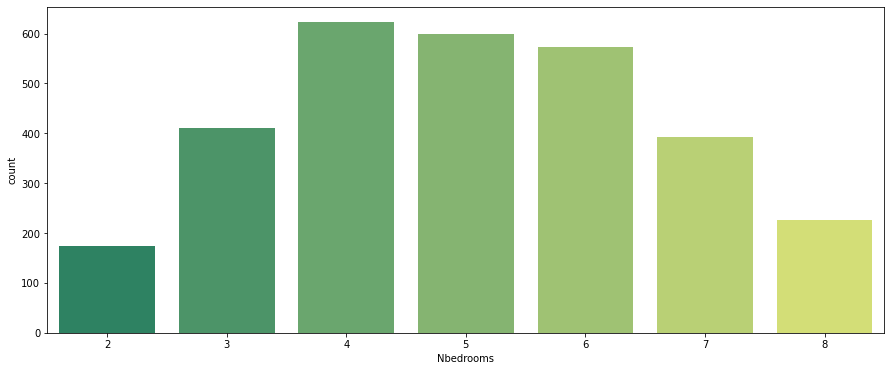

In [24]:
plt.figure(figsize=(15,6))
sns.countplot('Nbedrooms',data=df,palette='summer')
plt.show()

- Majority of the properties are having bedrooms between 4 to 6

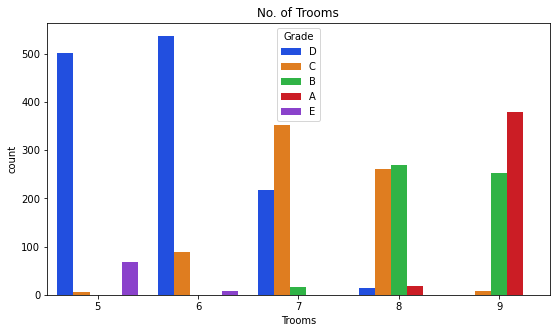

In [25]:
plt.figure(figsize=(9,5))
sns.countplot(x='Trooms',hue='Grade',data=df,palette='bright')
plt.title('No. of Trooms');

- Mostly properties with number of rooms more than 7 are in "Good" condition i.e. rating = "A" or "B".

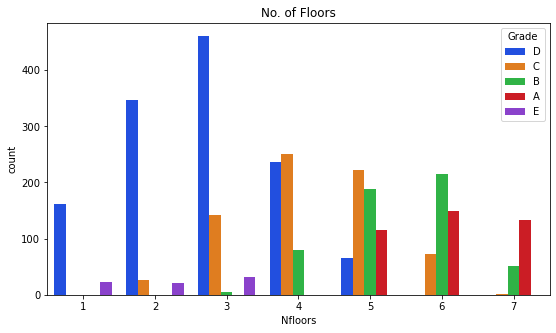

In [26]:
plt.figure(figsize=(9,5))
sns.countplot(x='Nfloors',hue='Grade',data=df,palette='bright')
plt.title('No. of Floors');

- Properties with number of floors more than 4 having good grade

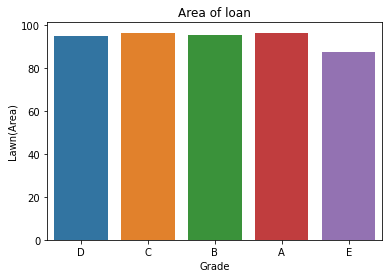

In [27]:
sns.barplot(x='Grade',y='Lawn(Area)',data=df.sort_values('Lawn(Area)',ascending=False),ci=False)
plt.title('Area of loan');

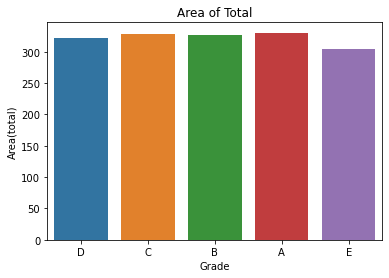

In [28]:
sns.barplot(x='Grade',y='Area(total)',data=df,ci=None)
plt.title('Area of Total')
plt.show()

- The Area of Total for the houses with Grade C and Grade A is more

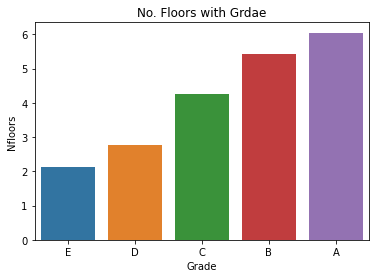

In [29]:
sns.barplot(x='Grade',y='Nfloors',data=df.sort_values('Nfloors'),ci=None)
plt.title('No. Floors with Grdae')
plt.show()

- Grade A has high no. of Floors

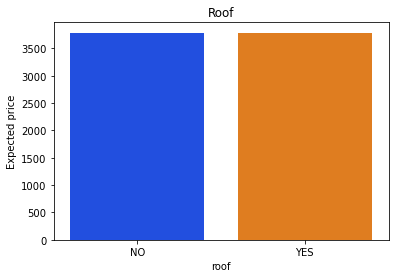

In [30]:
sns.barplot(x='roof',y='Expected price',data=df,ci=None,palette='bright')
plt.title('Roof')
plt.show()

There is not much difference in the Expected prices for the houses with roof and without roof.
​

<AxesSubplot:>

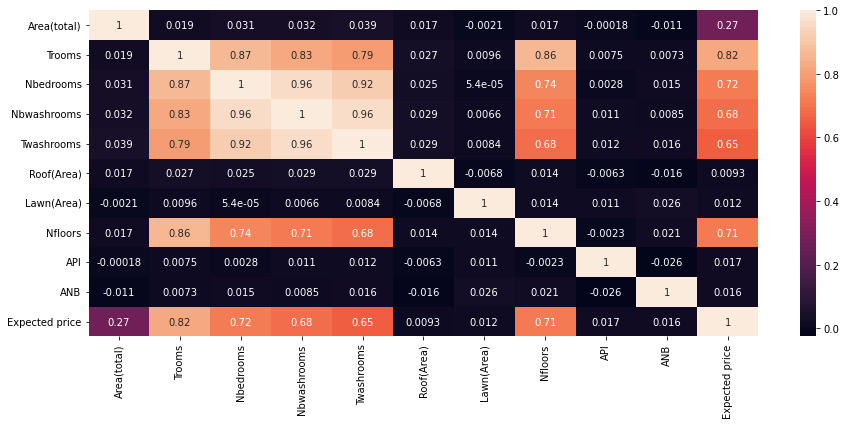

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

- in the Heatmap that Total Area, Roof Area,ANB,API and Lawn area has low correletd

In [32]:
df1=df.copy()

In [33]:
label_encoder=preprocessing.LabelEncoder()
df1["roof"]= label_encoder.fit_transform(df1["roof"])
df1["Grade"]= label_encoder.fit_transform(df1["Grade"])

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)

In [35]:
X = df2.drop(["Grade","API","ANB","Roof(Area)","Lawn(Area)"],axis=1)


In [36]:
y = df["Grade"]

In [37]:
#split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state = 42)

In [38]:
# create function for algorithm
def model_evaluator(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    
    acc_test=accuracy_score(y_test,y_pred)
    cv_score=np.mean(cross_val_score(model,X_train,y_train,cv=5))
    rec=recall_score(y_test,y_pred,average="weighted")
    fs=f1_score(y_test,y_pred,average="weighted")
    ps=precision_score(y_test,y_pred,average="weighted")
    
    print("Accuracy: ",acc_test)
    print("Recall Score: ", rec)
    print("f1_score: ",fs)  
    print("Precision score: ",ps)   
    print("Cross Validation Score",cv_score)
    
    print()
    print("\t\t\tClassification Report")
    print("--"*50)
    print(classification_report(y_test,y_pred))
    
    return acc_test,rec,fs,ps,cv_score
                        

# Decision Tree

In [39]:
dtree_model=DecisionTreeClassifier()

In [40]:
acc_test_dt,rec_dt,fs_dt,ps_dt,cv_score_dt=model_evaluator(dtree_model)

Accuracy:  0.8383333333333334
Recall Score:  0.8383333333333334
f1_score:  0.840594702153799
Precision score:  0.8443398772867919
Cross Validation Score 0.8175000000000001

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.89      0.83      0.86        87
           B       0.77      0.81      0.79       106
           C       0.74      0.78      0.76       125
           D       0.92      0.89      0.90       272
           E       0.46      0.60      0.52        10

    accuracy                           0.84       600
   macro avg       0.76      0.78      0.77       600
weighted avg       0.84      0.84      0.84       600



# Random Forest

In [41]:
rf_model=RandomForestClassifier()

In [42]:
acc_test_rf,rec_rf,fs_rf,ps_rf,cv_score_rf=model_evaluator(rf_model)

Accuracy:  0.8933333333333333
Recall Score:  0.8933333333333333
f1_score:  0.8913867157501617
Precision score:  0.8906150568903045
Cross Validation Score 0.8645833333333334

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.91      0.92      0.91        87
           B       0.85      0.81      0.83       106
           C       0.83      0.86      0.85       125
           D       0.94      0.95      0.95       272
           E       0.50      0.30      0.37        10

    accuracy                           0.89       600
   macro avg       0.81      0.77      0.78       600
weighted avg       0.89      0.89      0.89       600



# KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
kn_model=KNeighborsClassifier()

In [44]:
acc_test_kn,rec_kn,fs_kn,ps_kn,cv_score_kn=model_evaluator(kn_model)

Accuracy:  0.88
Recall Score:  0.88
f1_score:  0.879525741385462
Precision score:  0.8791635373341257
Cross Validation Score 0.8533333333333333

			Classification Report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.92      0.90      0.91        87
           B       0.83      0.82      0.82       106
           C       0.82      0.82      0.82       125
           D       0.93      0.94      0.94       272
           E       0.44      0.40      0.42        10

    accuracy                           0.88       600
   macro avg       0.79      0.78      0.78       600
weighted avg       0.88      0.88      0.88       600



In [45]:
model_name= ["DecisionTreeClassifier","Knn - Classifier","Random Forest Classifire"]

Accuracy=[acc_test_dt,acc_test_kn,acc_test_rf]
recall_score=[rec_dt,rec_kn,rec_rf]
f1_score=[fs_dt,fs_kn,fs_rf]
precision_score=[ps_dt,ps_kn,ps_rf]
CV_score=[cv_score_dt,cv_score_kn,cv_score_rf]


data= {"Accuracy":Accuracy,
              "recall_score":recall_score,
              "f1_score":f1_score,
              "precision_score":precision_score,
              "CV_score":CV_score}

dff=pd.DataFrame(data, index=model_name)
dff

,Accuracy,recall_score,f1_score,precision_score,CV_score
DecisionTreeClassifier,0.838333,0.838333,0.840595,0.844340,0.817500
Knn - Classifier,0.880000,0.880000,0.879526,0.879164,0.853333
Random Forest Classifire,0.893333,0.893333,0.891387,0.890615,0.864583


- From the above Comparison Report we understand that out of all the 3 classification models Random forest Classifiers gives us the best output.

In [46]:
#training a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF=RF.fit(X_train,y_train)
RF

RandomForestClassifier()

In [47]:
y_pred1=RF.predict(X_test)

In [48]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred1)

In [49]:
print("Accuracy: {:.2f}".format(accuracy))
print(classification_report(y_pred1, y_test))

Accuracy: 0.89
              precision    recall  f1-score   support

           A       0.91      0.91      0.91        87
           B       0.81      0.83      0.82       103
           C       0.86      0.81      0.84       133
           D       0.93      0.95      0.94       268
           E       0.40      0.44      0.42         9

    accuracy                           0.89       600
   macro avg       0.78      0.79      0.79       600
weighted avg       0.89      0.89      0.89       600



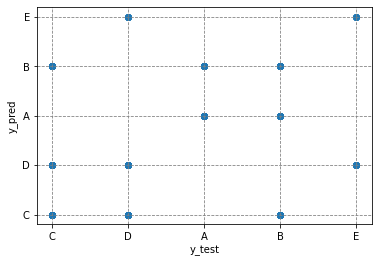

In [50]:
plt.scatter(y_test,y_pred1)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(color='gray', linestyle='dashed')
plt.show()

In [51]:
df2=pd.DataFrame({'Actual':y_test,'Predict':y_pred1,})
df2

,Actual,Predict
1801,C,C
1190,C,C
1817,D,D
251,C,C
2505,A,A
1117,B,B
1411,B,B
2113,A,A
408,B,B
2579,D,D


# Predict Grade

In [52]:
X.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Nfloors,Expected price
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.241831,-0.532429
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,-0.625028,-0.481292
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,0.608580,-0.061609
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,-1.241831,-1.144319
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-0.625028,0.105911


In [53]:
data=({'Area(total)':300,'Trooms':7,'Nbedrooms':6,'Nbwashrooms':5,'Twashrooms':7,'roof':1,'Nfloors':2,'Expected price':3450})

In [54]:
dfff=pd.DataFrame(data,index=[0])
dfff

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Nfloors,Expected price
0,300,7,6,5,7,1,2,3450


In [55]:
new_pred=RF.predict(dfff)
new_pred

array(['A'], dtype=object)